In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tabulate import tabulate as tab
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
import session_info
session_info.show()

# Problem 2: Demand Estimation

The sales of two companies, Company 1 and Company 2, in two regions,
Region 1 and Region 2, are provided here. The description of the only three columns
are:

    ● Sales_U → Sales in equivalent units (lbs)
    ● Sales_USD → Sales in $
    ● date → starting date for the week


● Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies.

In [3]:
# load the data to a pandas dataframe
R1_C1 = pd.read_csv("region1_company1.csv")
R2_C1 = pd.read_csv("region2_company1.csv")
R1_C2 = pd.read_csv("region1_company2.csv")
R2_C2 = pd.read_csv("region2_company2.csv")

In [4]:
# check that the data is free of missing values
R1_C1.info()
print("\n")
R2_C1.info()
print("\n")
R1_C2.info()
print("\n")
R2_C2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object

In [5]:
#add a column with the price 

R1_C1["Price_USD"] = R1_C1["Sales_USD"]/R1_C1["Sales_U"]
R2_C1["Price_USD"] = R2_C1["Sales_USD"]/R2_C1["Sales_U"]
R1_C2["Price_USD"] = R1_C2["Sales_USD"]/R1_C2["Sales_U"]
R2_C2["Price_USD"] = R2_C2["Sales_USD"]/R2_C2["Sales_U"]

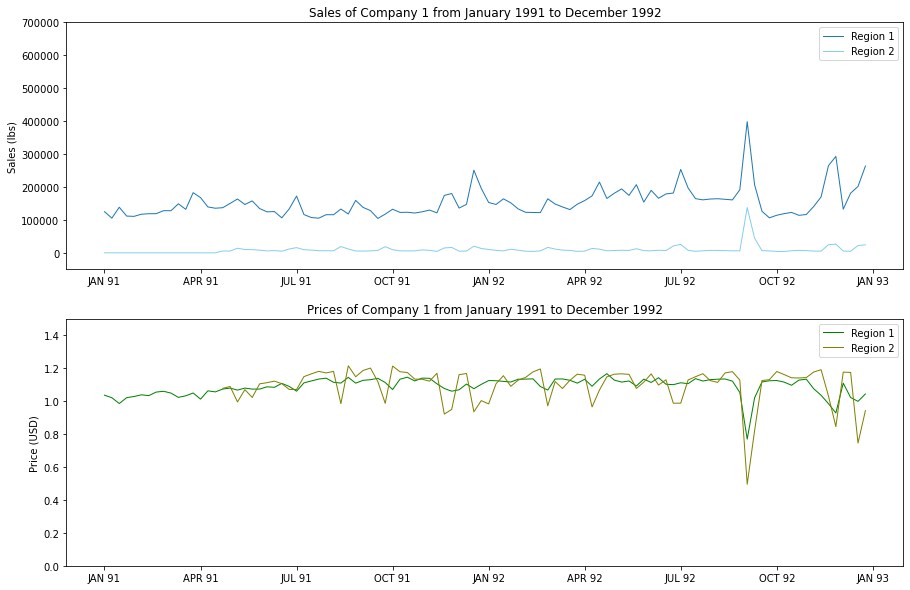

In [6]:
#time series plot with the sales and prices of Company 1

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

#plot of the sales

ax1.set_title("Sales of Company 1 from January 1991 to December 1992")


ax1.plot(R1_C1["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(R2_C1["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.legend(loc="upper right")

ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_ylim(-50000,700000)

#plot of the prices

ax2.set_title("Prices of Company 1 from January 1991 to December 1992")

ax2.plot(R1_C1["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(R2_C1["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax2.legend(loc="upper right")

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_ylim(0,1.5)

plt.show()

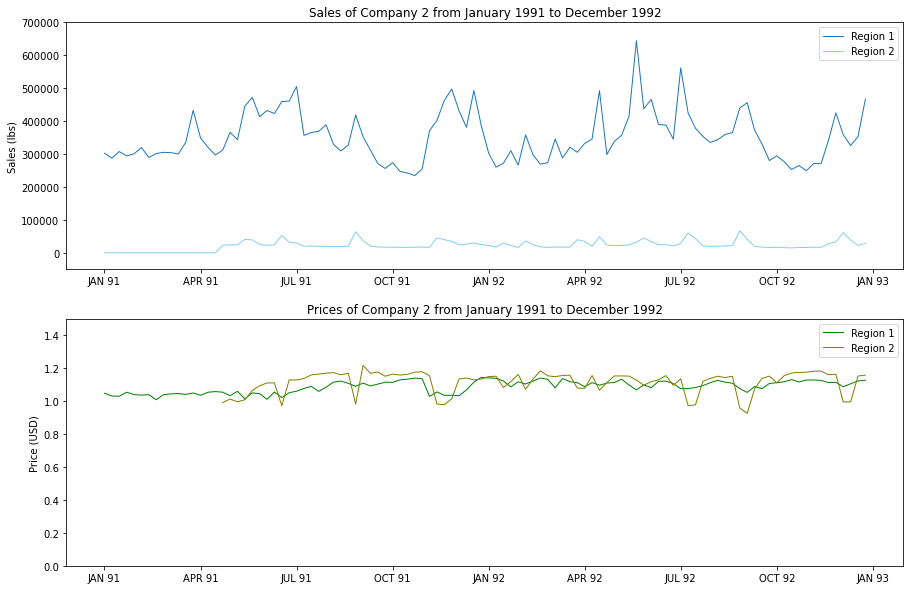

In [7]:
#time series plot with the sales and prices of Company 2

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

#plot of the sales

ax1.set_title("Sales of Company 2 from January 1991 to December 1992")


ax1.plot(R1_C2["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(R2_C2["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.legend(loc="upper right")

ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_ylim(-50000,700000)

#plot of the prices

ax2.set_title("Prices of Company 2 from January 1991 to December 1992")

ax2.plot(R1_C2["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(R2_C2["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax2.legend(loc="upper right")

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_ylim(0,1.5)

plt.show()

● Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

In [8]:
#generate new dataframes to analyze the demand curve 


#new dataframe for Company 1 at Region 1 without the dates and sorted according to the sales magnitude
r1_c1 = R1_C1.drop(columns="Date")
r1_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

#new dataframe for Company 1 at Region 2 we delete the rows with null values corresponding to the beginning of the time series
#when the price and demand where zero
r2_c1 = R2_C1.drop(columns="Date")
r2_c1.dropna(inplace=True)
r2_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)


#similar proceedure for Company 2
r1_c2 = R1_C2.drop(columns="Date")
r1_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c2 = R2_C2.drop(columns="Date")
r2_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)
r2_c2.dropna(inplace=True)

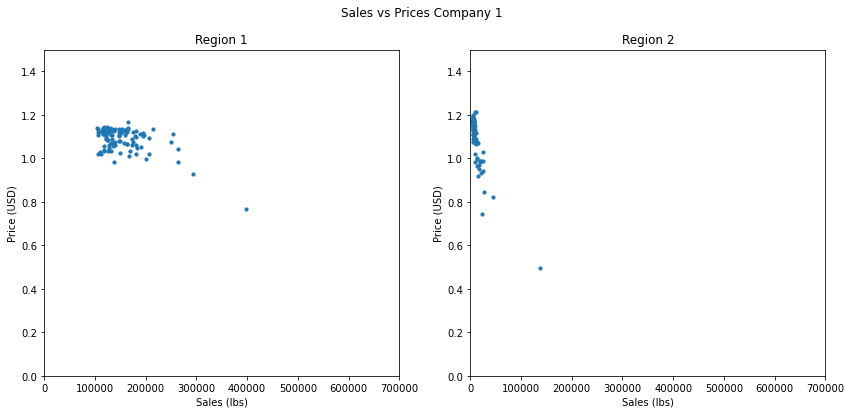

In [9]:
#scatter plot of sales vs prices from Company 1

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6) ,sharex=True)
fig.suptitle("Sales vs Prices Company 1")

#plot region 1
ax1.set_title("Region 1")
ax1.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

#plot region 2
ax2.set_title("Region 2")
ax2.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

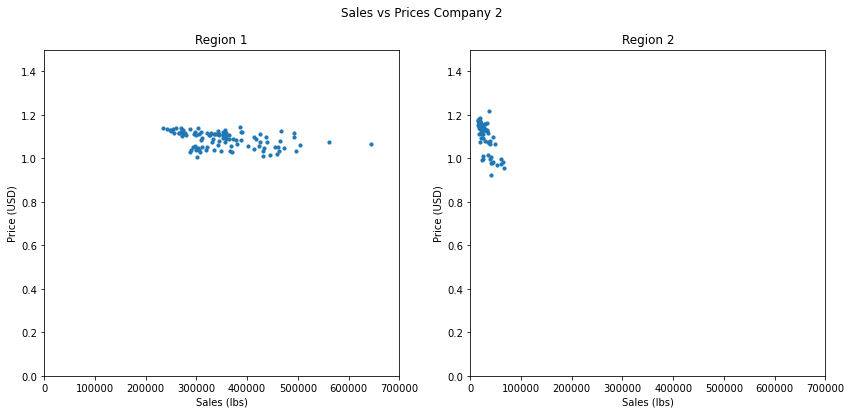

In [10]:
#scatter plot of sales vs prices from Company 2

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6) ,sharex=True)
fig.suptitle("Sales vs Prices Company 2")

#plot region 1
ax1.set_title("Region 1")
ax1.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

#plot region 2
ax2.set_title("Region 2")
ax2.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

We assume that the demand curve follows a linear regression model $y =\alpha +\beta x +\varepsilon$ and conduct an hypothesis test for the sign of the slope. Under such assumptions $$\beta =\frac{r \sqrt{n-2} }{\sqrt{1 -r^2}}\sim t(n-2), $$
where $r$ denotes the Pearsons correlation coeficient and $t(n-2)$ is the Student's $t$ distribution with $n-2$ degrees of freedom.

We can find evidence for the negativity of the slope is by means of the one sided hypothesis test

$$H_0: \beta \geq 0 $$
$$H_1: \beta < 0 $$

Rejecting the null hypothesis will imply that there's strong evidence to the slope for being negative. As usual we choose a $p$-value of $.05$.

In [11]:
#test for the negativity of the slope of the demand curve at Company 1 Region 1

#compute the parameters
n11 = len(r1_c1["Sales_U"])
r11 = scipy.stats.pearsonr(r1_c1["Sales_U"],r1_c1["Price_USD"])[0]

#compute the statistic
T11 = r11*math.sqrt((n11-2)/(1-r11**2))

#compute the critical value for the acceptance region
t11 = scipy.stats.t.ppf(.05, n11-2)

#determine if the null hypothesis is accepted or rejected
if T11 >= t11:
    print("There is not enough evidence supporting that the slope is negative")

elif T11 < t11:    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [12]:
#test for the negativity of the slope of the demand curve at Company 1 Region 2

n21 = len(r2_c1["Sales_U"])
r21 = scipy.stats.pearsonr(r2_c1["Sales_U"],r2_c1["Price_USD"])[0]

T21 = r21*math.sqrt((n21-2)/(1-r21**2))

t21 = scipy.stats.t.ppf(.05, n21-2)

if T21 >= t21:
    print("There is not enough evidence supporting that the slope is negative")

elif T21 < t21:
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [13]:
#test for the negativity of the slope of the demand curve at Company 2 Region 1

n12 = len(r1_c2["Sales_U"])
r12 = scipy.stats.pearsonr(r1_c2["Sales_U"], r1_c2["Price_USD"])[0]

T12 = r12*math.sqrt((n12-2)/(1-r12**2))

t12 = scipy.stats.t.ppf(.05, n12-2)

if T12 >= t12:
    
    print("There is not enough evidence supporting that the slope is negative")

elif T12 < t12:
    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [14]:
#test for the negativity of the slope of the demand curve at Company 2 Region 2

n22 = len(r2_c2["Sales_U"])
r22 = scipy.stats.pearsonr(r2_c2["Sales_U"], r2_c2["Price_USD"])[0]

T22 = r22*math.sqrt((n22-2)/(1-r22**2))

t22 = scipy.stats.t.ppf(.05, n22-2)

if T22 >= t22:
    
    print("There is not enough evidence supporting that the slope is negative")

elif T22 < t22:
    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


There is strong evidence supporting that the slope of the demand curve is negative in the four cases.

In both companies the curve of the demand in Region 1 tends to be horizontal, and in Region 2 tends to be vertical. This  behavior suggests that the demand is more elastic in Region 1 than in Region 2.

● Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

We assume that the demand curve follows a contant price elasticity model meaning that $P = AQ^{1/k} $ where $Q$ is the demanded quantity $P$ its price, $A$ the price of the product when $Q=1$ and $k$ the price elasticity.  Such equation is equivalent to $\log P = \log A+ \frac{1}{k}\log Q$, thus for estimating the parameter $k$ (and $A$) we run a linear regression model over the logarithms of the sales and the prices.

In [15]:
# assign new columns with the logarithm of the sales and prices
r1_c1["log_Sales_U"] = np.log(r1_c1["Sales_U"])
r1_c1["log_Price_USD"] = np.log(r1_c1["Price_USD"])

r2_c1["log_Sales_U"] = np.log(r2_c1["Sales_U"])
r2_c1["log_Price_USD"] = np.log(r2_c1["Price_USD"])

r1_c2["log_Sales_U"] = np.log(r1_c2["Sales_U"])
r1_c2["log_Price_USD"] = np.log(r1_c2["Price_USD"])

r2_c2["log_Sales_U"] = np.log(r2_c2["Sales_U"])
r2_c2["log_Price_USD"] = np.log(r2_c2["Price_USD"])


# fit the linear regression model and get the values of the slope m and the y-intercept of the line

#Company 1 Region 1
x11 = np.array(r1_c1["log_Sales_U"]).reshape(-1,1)
y11 = np.array(r1_c1["log_Price_USD"]).reshape(-1,1)
lm11 = LinearRegression().fit(x11, y11)
m11 = lm11.coef_[0][0]
b11 = lm11.predict([[0]])

#Company 1 Region 2
x21 = np.array(r2_c1["log_Sales_U"]).reshape(-1,1)
y21 = np.array(r2_c1["log_Price_USD"]).reshape(-1,1)
lm21 = LinearRegression().fit(x21, y21)
m21 = lm21.coef_[0][0]
b21 = lm21.predict([[0]])

#Company 2 Region 1
x12 = np.array(r1_c2["log_Sales_U"]).reshape(-1,1)
y12 = np.array(r1_c2["log_Price_USD"]).reshape(-1,1)
lm12 = LinearRegression().fit(x12, y12)
m12 = lm12.coef_[0][0]
b12 = lm12.predict([[0]])

#Company 2 Region 2
x22 = np.array(r2_c2["log_Sales_U"]).reshape(-1,1)
y22 = np.array(r2_c2["log_Price_USD"]).reshape(-1,1)
lm22 = LinearRegression().fit(x22, y22)
m22 = lm22.coef_[0][0]
b22 = lm22.predict([[0]])


#compute k and A
k11, A11 = (m11)**(-1), np.exp(b11)[0][0]
k21, A21 = (m21)**(-1), np.exp(b21)[0][0]
k12, A12 = (m12)**(-1), np.exp(b12)[0][0]
k22, A22 = (m22)**(-1), np.exp(b22)[0][0]

We present a table with the estimated elasticity values: 

In [16]:
col_names = ["","Region 1", "Region 2"]
data = [["Company 1",k11, k21], ["Company 2",k12, k22] ]
  
print(tab(data, headers=col_names))

             Region 1    Region 2
---------  ----------  ----------
Company 1     -9.8838    -5.49479
Company 2    -15.4046    -7.99822


The demand is more elastic at Region 1 compared with Region 2 in both companies. In the four models $k<-1$ implying that the demand is elastic ($-1<k<0$ would imply that the demand is inelastic).

We plot regression curve for the demand (EXPLAIN BETTER)

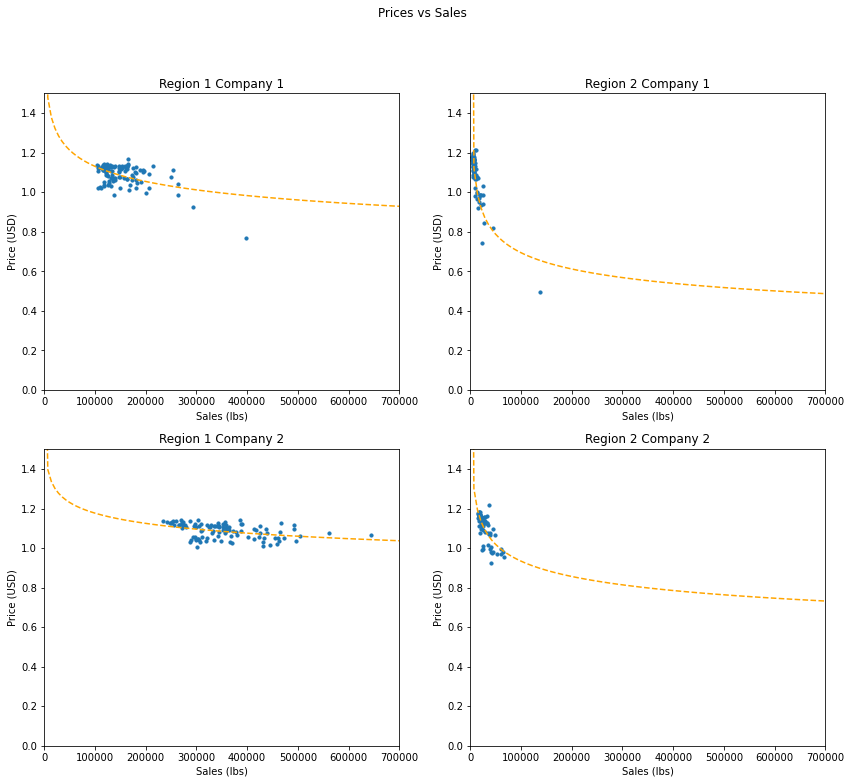

In [17]:
xseq = np.linspace(1, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,12))
fig.suptitle("Prices vs Sales")


ax11.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax11.plot(xseq, A11 * (xseq**(k11**(-1))) , color="orange", linestyle="--")

ax11.set_xlim(0,700000)
ax11.set_ylim(0,1.5)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Sales (lbs)")
ax11.set_ylabel("Price (USD)")


ax21.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax21.plot(xseq, A21 * (xseq**(k21**(-1))) , color="orange", linestyle="--")

ax21.set_xlim(0,700000)
ax21.set_ylim(0,1.5)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Sales (lbs)")
ax21.set_ylabel("Price (USD)")


ax12.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax12.plot(xseq, A12 * (xseq**(k12**(-1))) , color="orange", linestyle="--")

ax12.set_xlim(0,700000)
ax12.set_ylim(0,1.5)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Sales (lbs)")
ax12.set_ylabel("Price (USD)")


ax22.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax22.plot(xseq, A22 * (xseq**(k22**(-1))) , color="orange", linestyle="--")

ax22.set_xlim(0,700000)
ax22.set_ylim(0,1.5)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Sales (lbs)")
ax22.set_ylabel("Price (USD)")


plt.show()

● Compute the % change in unit sales for a 10% increase in the price of Company 1 at Region 1.

The assumption $P = AQ^{1/K}$ is equivalent to $Q=\left(\frac{P}{A}\right)^k $. Thus if the prices increases 10% the percentage of change in unit sales is given by $$100\%\times\left[\frac{\left(\frac{1.1 P}{A}\right)^k}{\left(\frac{P}{A}\right)^k}-1\right]=100\%\times\left((1.1)^k-1\right). $$ We estimate the requested quantity by means of the previous formula.

In [18]:
((1.1)**k11- 1)*100

-61.01629900531451

● You may be called upon to report to your manager whether your brand is vulnerable to a competitor's pricing policies. That is, to what extent does the demand for your product depend on (or is affected by) your competitors' pricing policy? Which brand is more "vulnerable"? Be specific as to why.

For evaluating if there is a degree of vulnerability of the sales of Company 1 affected by the prices of Company 2 we propose a correlation analysis. Instead of directly computing the degree of correlation between the sales and price time series, we analyze the correlation between its percentage of change. Lets first proceed the analysis in Region 1.

In [19]:
#add new columns with the percentage of change
R1_C1["pct_Sales_U"] = R1_C1["Sales_U"].pct_change()
R1_C2["pct_Price_USD"] = R1_C2["Price_USD"].pct_change()

#compute the correlation
R1_C1["pct_Sales_U"].corr(R1_C2["pct_Price_USD"])

-0.06750907736650177

The correlation is slightly negative, this means that Company 1 is a little vulnerable to the prices policy of Company 2 at Region 1. Lets perform the analysis in Region 2.

In [20]:
R2_C1["pct_Sales_U"] = R2_C1["Sales_U"].pct_change()
R2_C2["pct_Price_USD"] = R2_C2["Price_USD"].pct_change()

R2_C1["pct_Sales_U"].corr(R2_C2["pct_Price_USD"])

0.00037669691539870696

The correlation is positive and implying that the Company 1 is not vulnerable to the prices policies of Company 2 at Region 2.

We conclude that the brand from Region 1 is more vulnerable.

● While making a crucial presentation of the above results in front of your team, your analyst colleague questions your results as follows: "This is all fine. But,you know, you're missing a lot of variables in your so-called regression model. For instance, the sales of Company 1 at Region 2 are clearly affected by store traffic. When it snows, less people visit Region 2, and youdon't have suchfactors -- the weather, temperature, traffic congestions, etc. So aren't yourcross-price effects all wrong?" Is your colleague right or wrong?

In [ ]:
r1_c1["Pred_log_Price_USD"] =m11*r1_c1["log_Sales_U"]+b11
r1_c1["Res_log_Price_USD"] = r1_c1["log_Price_USD"]-r1_c1["Pred_log_Price_USD"]
plt.hist(r1_c1["Res_log_Price_USD"], bins=20)
plt.show()

In [ ]:
r2_c1["Pred_log_Price_USD"] =m21*r2_c1["log_Sales_U"]+b21
r2_c1["Res_log_Price_USD"] = r2_c1["log_Price_USD"]-r2_c1["Pred_log_Price_USD"]
plt.hist(r2_c1["Res_log_Price_USD"], bins=20)
plt.show()

In [ ]:
r1_c2["Pred_log_Price_USD"] =m12*r1_c2["log_Sales_U"]+b12
r1_c2["Res_log_Price_USD"] = r1_c2["log_Price_USD"]-r1_c2["Pred_log_Price_USD"]
plt.hist(r1_c2["Res_log_Price_USD"], bins=20)
plt.show()

In [ ]:
r2_c2["Pred_log_Price_USD"] =m22*r2_c2["log_Sales_U"]+b22
r2_c2["Res_log_Price_USD"] = r2_c2["log_Price_USD"]-r2_c2["Pred_log_Price_USD"]
plt.hist(r2_c2["Res_log_Price_USD"], bins=20)
plt.show()

In [ ]:
#xseq = np.linspace(1, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,12))
#fig.suptitle("Prices vs Sales")


ax11.scatter(r1_c1["log_Sales_U"],r1_c1["log_Price_USD"],s=10)
#ax11.plot(xseq, A11 * (xseq**(k11**(-1))) , color="orange", linestyle="--")

ax11.set_xlim(8.5,13.4)
ax11.set_ylim(-0.6,.2)

#ax11.set_title("Region 1 Company 1")
#ax11.set_xlabel("Sales (lbs)")
#ax11.set_ylabel("Price (USD)")


ax21.scatter(r2_c1["log_Sales_U"],r2_c1["log_Price_USD"],s=10)
#ax21.plot(xseq, A21 * (xseq**(k21**(-1))) , color="orange", linestyle="--")

ax21.set_xlim(8.5,13.4)
ax21.set_ylim(-0.6,.2)

#ax21.set_title("Region 2 Company 1")
#ax21.set_xlabel("Sales (lbs)")
#ax21.set_ylabel("Price (USD)")


ax12.scatter(r1_c2["log_Sales_U"],r1_c2["log_Price_USD"],s=10)
#ax12.plot(xseq, A12 * (xseq**(k12**(-1))) , color="orange", linestyle="--")

ax12.set_xlim(8.5,13.4)
ax12.set_ylim(-0.6,.2)

#ax12.set_title("Region 1 Company 2")
#ax12.set_xlabel("Sales (lbs)")
#ax12.set_ylabel("Price (USD)")


ax22.scatter(r2_c2["log_Sales_U"],r2_c2["log_Price_USD"],s=10)
#ax22.plot(xseq, A22 * (xseq**(k22**(-1))) , color="orange", linestyle="--")

ax22.set_xlim(8.5,13.4)
ax22.set_ylim(-0.6,.2)

#ax22.set_title("Region 2 Company 2")
#ax22.set_xlabel("Sales (lbs)")
#ax22.set_ylabel("Price (USD)")


plt.show()